In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [96]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')


In [97]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [98]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

this are the first five rows of the dataset 

In [99]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

this are the last five rows of the dataset

In [100]:
df.sample(5)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
3537     13.0  17-07-2015          27.9          18.9    57.579689   
7467     18.0  19-08-2017          28.6          23.2    84.054276   
3004      5.0  27-08-2014          27.2          20.6    52.300072   
5590     16.0  06-08-2016          33.4          24.9    56.398109   
798      24.0  31-07-2013          29.7          25.3    49.639225   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
3537    68.033722         26.912706         21.468934  5.051625   24.294979   
7467    91.868958         25.877581         22.679823  7.245137   50.842421   
3004    84.870964         28.094586         19.664176  6.063017  115.249859   
5590    87.206039         32.561165         27.665166  6.053912  103.451038   
798     78.299561         32.041668         25.630640  4.696146   40.165391   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
3537  ...    0.000000    0.000000     0.00000  37.5776  127.083  59.8324   
7467  ...    1.464029    3.720154     0.27938  37.4832  127.024  56.4448   
3004  ...    0.000000    0.000000     0.00000  37.5507  127.135  35.0380   
5590  ...    0.000000    0.000000     0.00000  37.4697  126.995  82.2912   
798   ...    0.000000    0.000000     0.00000  37.5237  126.909  17.2956   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
3537  2.6865      5686.350098       27.7       22.1  
7467  1.2313      4850.415527       25.9       22.4  
3004  0.5055      4563.660156       29.4       19.0  
5590  2.2579      5213.218750       33.9       24.4  
798   0.2223      5406.136719       34.3       25.0  

[5 rows x 25 columns]

this are the random samples taken by the dataset

In [101]:
df.shape

(7752, 25)

this dataset contains 7752 rows and the 25 features(columns) out of that one is our target variable('Next_Tmax')

In [102]:
df.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


in the above  info method we can see there is some null values are present in the database

and 24 columns datatype is ('float64') and 1 is ('object') 

In [104]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

as we can see the datatype of the date column is ('object') we have to change the datatype of the date column


In [105]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [106]:
df.dtypes


station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

as we can see here we have changed the datatype of the datetime column now it is perfect. 

In [107]:
df

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   
7750      NaN        NaT          20.0          11.3    19.794666   
7751      NaN        NaT          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [108]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

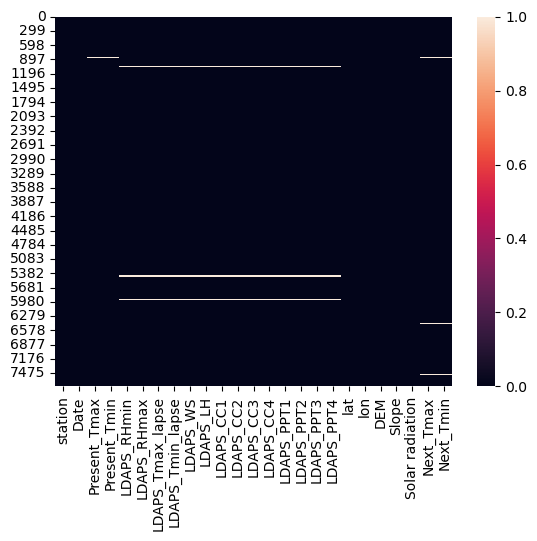

In [109]:
sns.heatmap(df.isnull())

in the above heatmap we can see there is null values are present in the dataset. let's handle it 

In [110]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [111]:
df['station']=df['station'].fillna(df['station'].mean())
df['Date']=df['Date'].fillna(df['Date'].median())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].median())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].median())

In [112]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

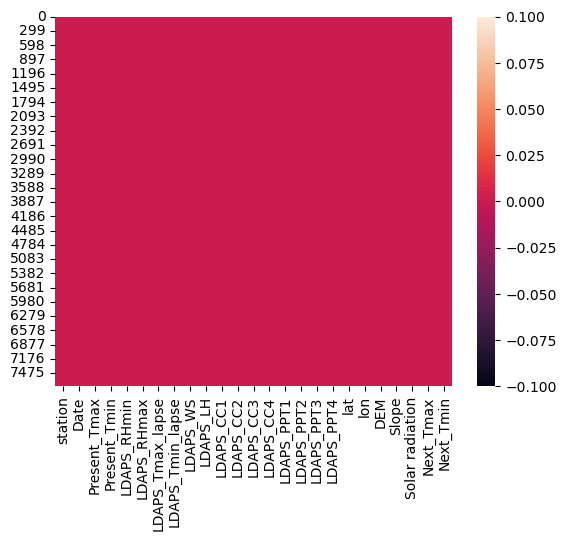

In [113]:
sns.heatmap(df.isnull())

we have filled the null values. now it looks perfect

In [114]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


2013-06-30 00:00:00    25
2016-07-19 00:00:00    25
2016-07-26 00:00:00    25
2016-07-25 00:00:00    25
2016-07-24 00:00:00    25
                       ..
2014-08-10 00:00:00    25
2014-08-09 00:00:00    25
2014-08-08 00:00:00    25
2014-08-07 00:00:00    25
2015-07-30 12:00:00     2
Name: Date, Length: 311, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 156,

In [115]:
df.nunique().to_frame('unique values')

unique values
station                      25
Date                        311
Present_Tmax                168
Present_Tmin                156
LDAPS_RHmin                7673
LDAPS_RHmax                7665
LDAPS_Tmax_lapse           7676
LDAPS_Tmin_lapse           7676
LDAPS_WS                   7676
LDAPS_LH                   7676
LDAPS_CC1                  7570
LDAPS_CC2                  7583
LDAPS_CC3                  7600
LDAPS_CC4                  7525
LDAPS_PPT1                 2813
LDAPS_PPT2                 2511
LDAPS_PPT3                 2357
LDAPS_PPT4                 1919
lat                          12
lon                          25
DEM                          25
Slope                        27
Solar radiation            1575
Next_Tmax                   183
Next_Tmin                   157

In [116]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.261185  ...     1.754258     1.156174     1.200364     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.024276     0.009697     0.000693    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.275671   
std       0.079435    54.279780     1.370444       429.158867     3.122585   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932804  
std       2.483296  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

as we can see in the describe method ('LDAPS_LH'), ('DEM'), ('Solar radiation') features mean value is greater than the median value it means this features are bias on the right side

and also there is difference between there (75%) percentile value and the maximum(100%) percentile value it means there might be outliers are present in the dataset

# Data Analysis

univariate Analysis

In [117]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

mean value 13.0
median value 13.0
mode value 0    13.0
Name: station, dtype: float64


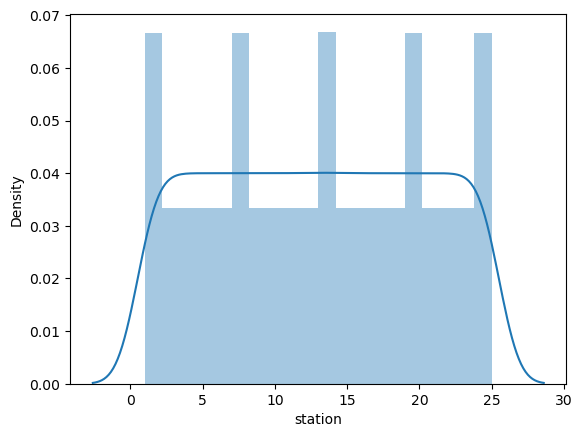



mean value 2015-07-30 21:35:51.083591168
median value 2015-07-30 12:00:00
mode value 0     2013-06-30
1     2013-07-01
2     2013-07-02
3     2013-07-03
4     2013-07-04
         ...    
305   2017-08-26
306   2017-08-27
307   2017-08-28
308   2017-08-29
309   2017-08-30
Name: Date, Length: 310, dtype: datetime64[ns]


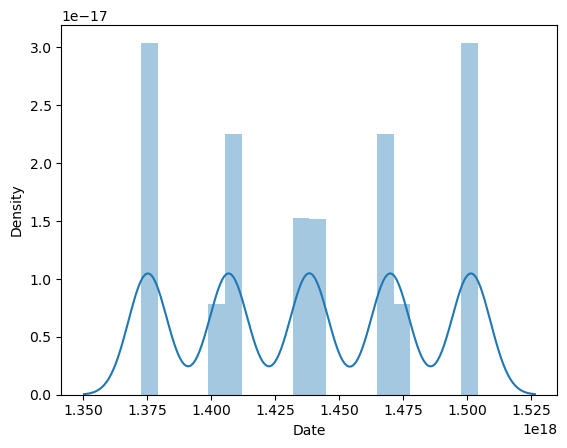



mean value 29.768211403280397
median value 29.9
mode value 0    31.4
Name: Present_Tmax, dtype: float64


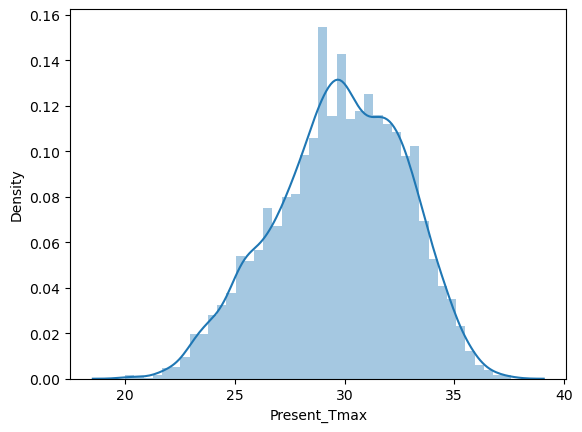



mean value 23.225058578495183
median value 23.4
mode value 0    24.0
Name: Present_Tmin, dtype: float64


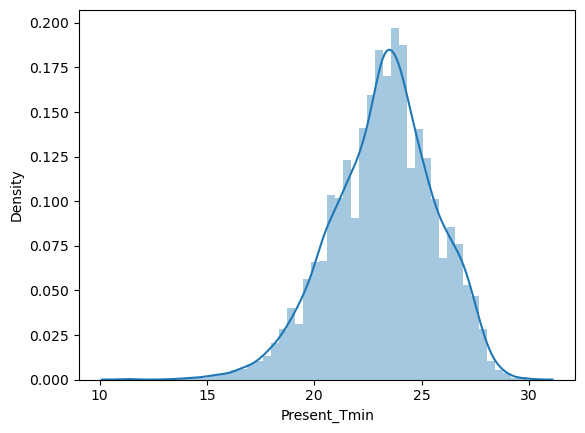



mean value 56.759372150692975
median value 55.313243865000004
mode value 0    56.759372
Name: LDAPS_RHmin, dtype: float64


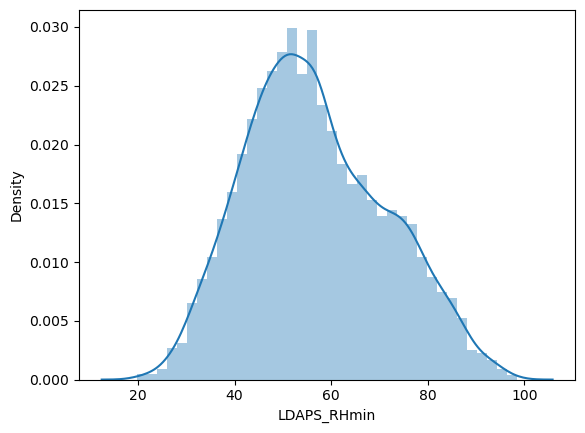



mean value 88.37480388719032
median value 89.69950485000001
mode value 0    88.374804
Name: LDAPS_RHmax, dtype: float64


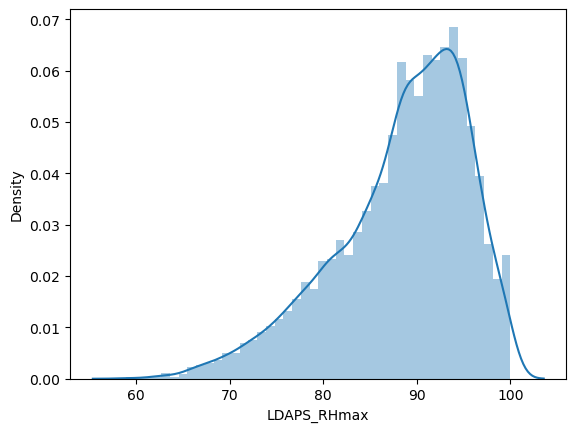



mean value 29.6134465428136
median value 29.662273120000002
mode value 0    29.613447
Name: LDAPS_Tmax_lapse, dtype: float64


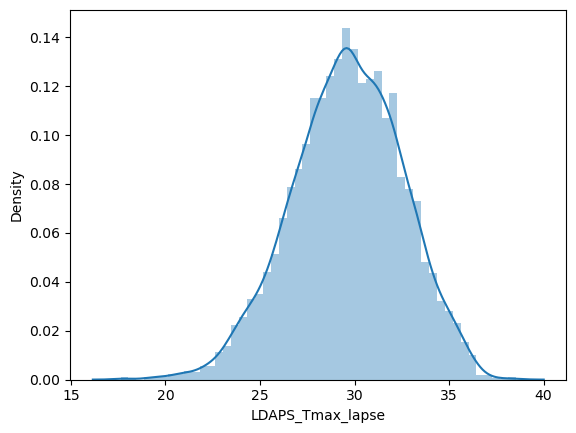



mean value 23.5125887762798
median value 23.735941995
mode value 0    23.512589
Name: LDAPS_Tmin_lapse, dtype: float64


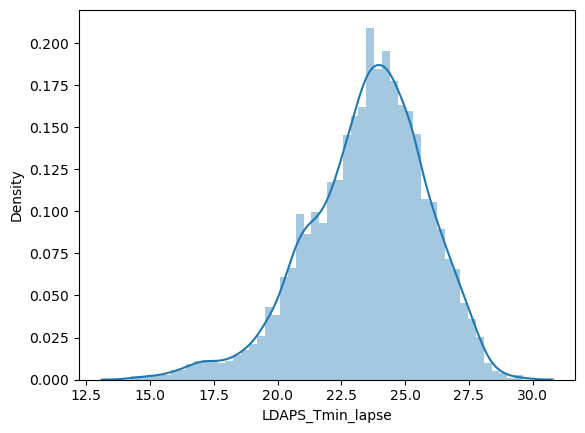



mean value 7.097874569625374
median value 6.5630681515
mode value 0    7.097875
Name: LDAPS_WS, dtype: float64


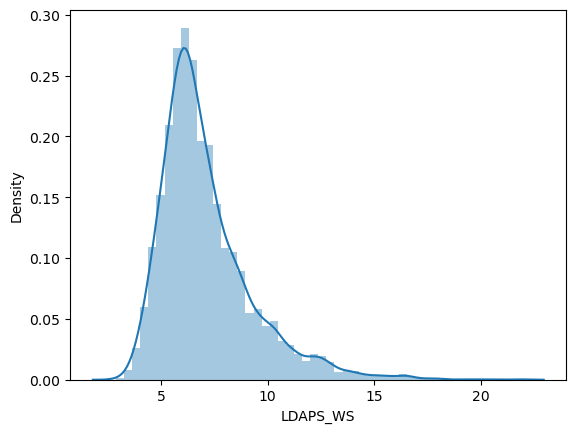



mean value 62.5050189093405
median value 57.3106298
mode value 0    62.505019
Name: LDAPS_LH, dtype: float64


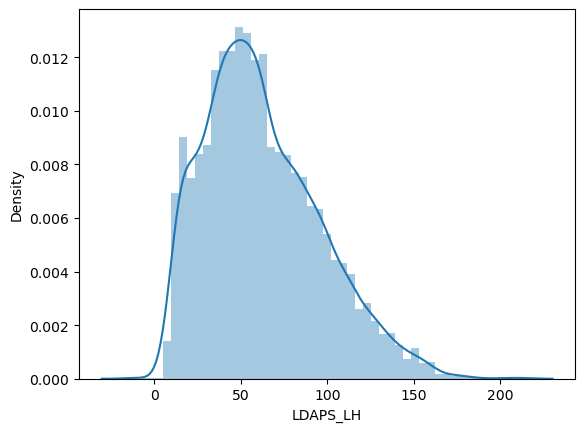



mean value 0.3687735855982806
median value 0.32011006649999996
mode value 0    0.0
Name: LDAPS_CC1, dtype: float64


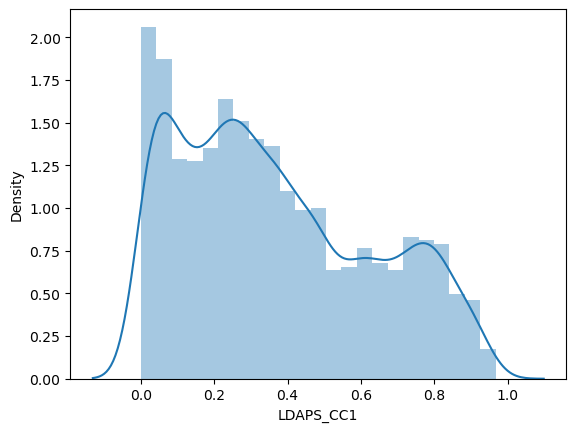



mean value 0.3560804372839651
median value 0.31566675
mode value 0    0.0
Name: LDAPS_CC2, dtype: float64


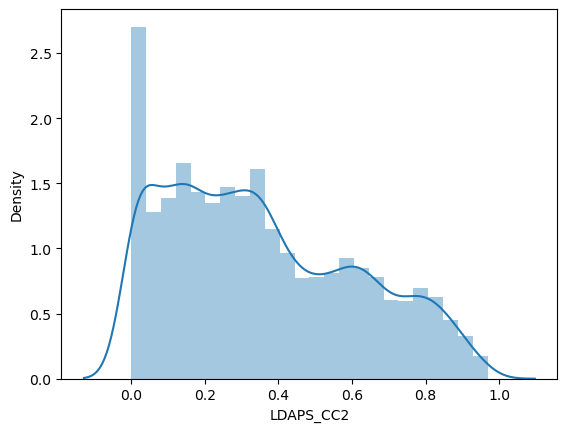



mean value 0.3184039558214146
median value 0.2652640175
mode value 0    0.0
Name: LDAPS_CC3, dtype: float64


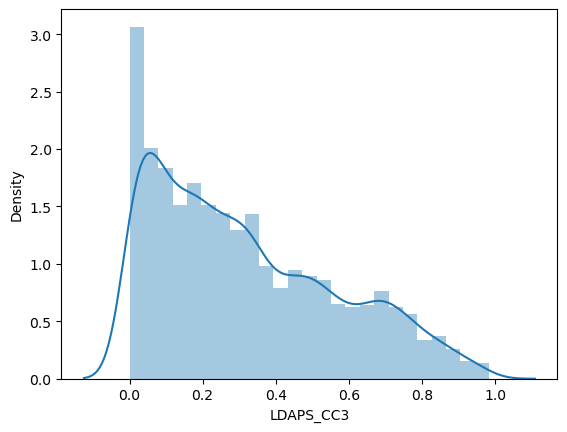



mean value 0.29919138891453695
median value 0.2323539235
mode value 0    0.0
Name: LDAPS_CC4, dtype: float64


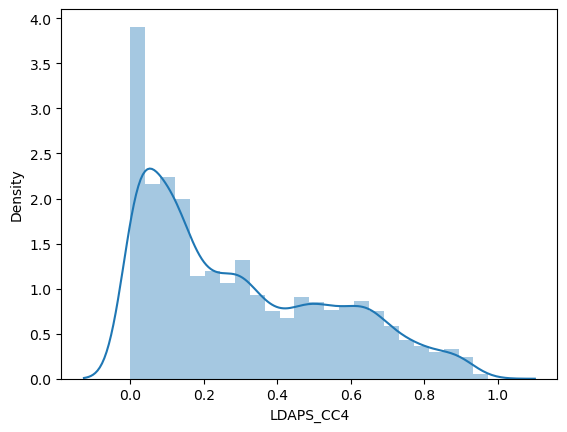



mean value 0.5919945266984499
median value 0.0
mode value 0    0.0
Name: LDAPS_PPT1, dtype: float64


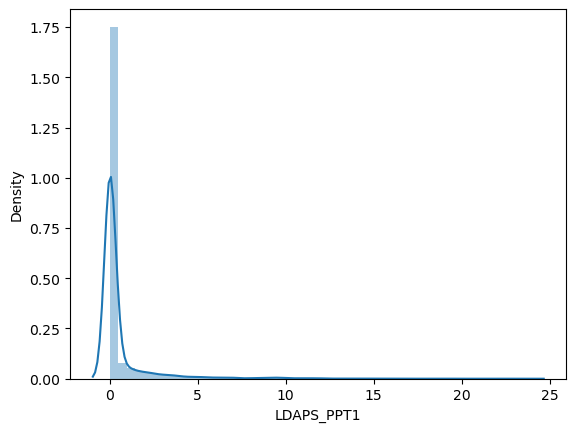



mean value 0.4850025590969129
median value 0.0
mode value 0    0.0
Name: LDAPS_PPT2, dtype: float64


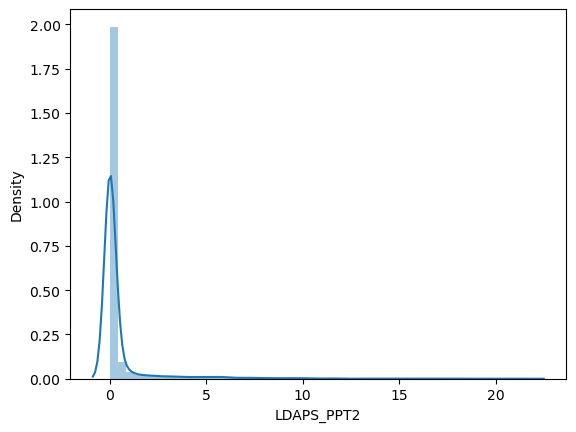



mean value 0.2781996392747167
median value 0.0
mode value 0    0.0
Name: LDAPS_PPT3, dtype: float64


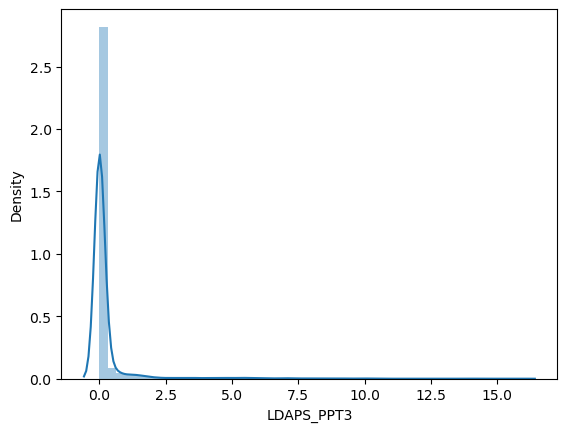



mean value 0.26940734997772564
median value 0.0
mode value 0    0.0
Name: LDAPS_PPT4, dtype: float64


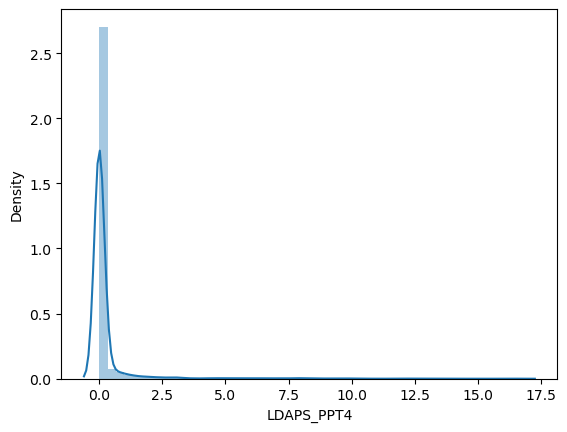



mean value 37.54472151702786
median value 37.5507
mode value 0    37.5507
1    37.5776
Name: lat, dtype: float64


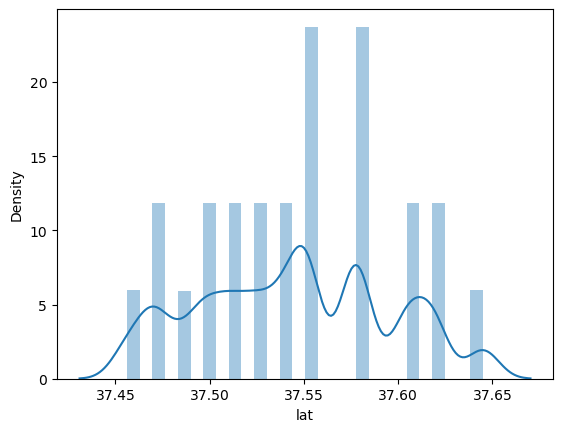



mean value 126.9913971878225
median value 126.995
mode value 0    126.826
1    127.135
Name: lon, dtype: float64


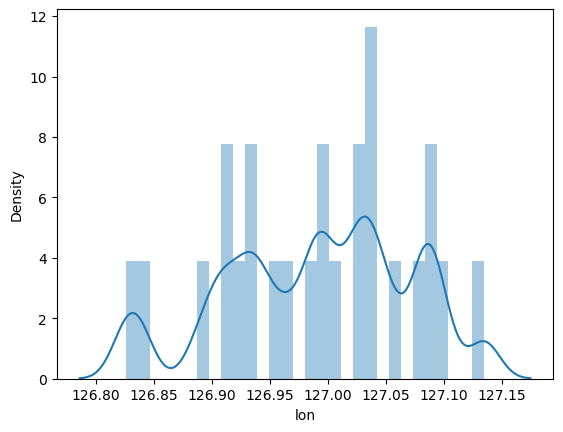



mean value 61.86797226522187
median value 45.716
mode value 0     12.370
1    212.335
Name: DEM, dtype: float64


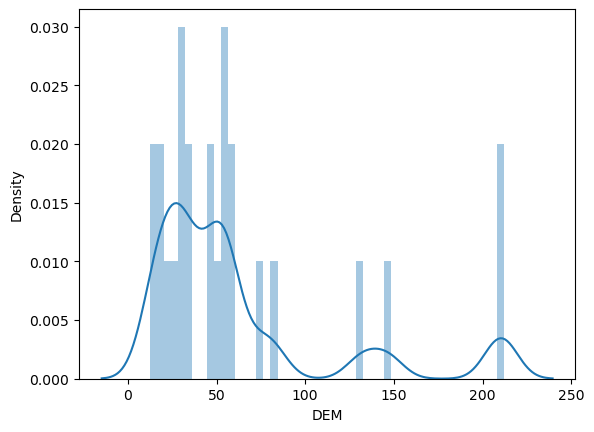



mean value 1.257048465505676
median value 0.618
mode value 0     0.0985
1     0.1332
2     0.1457
3     0.1554
4     0.2223
5     0.2661
6     0.2713
7     0.4125
8     0.5055
9     0.5141
10    0.5721
11    0.5931
12    0.6180
13    0.6233
14    0.6970
15    0.8552
16    1.2313
17    1.5629
18    1.7678
19    2.2579
20    2.5348
21    2.6865
22    2.7850
23    4.7296
24    5.1782
Name: Slope, dtype: float64


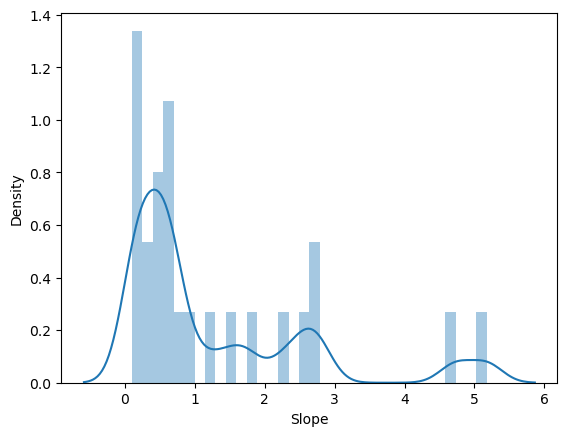



mean value 5341.502802661377
median value 5436.345214999999
mode value 0       4371.684570
1       4406.334473
2       4413.500000
3       4434.277832
4       4435.611816
           ...     
1521    5968.809082
1522    5975.676270
1523    5981.979492
1524    5987.718750
1525    5992.895996
Name: Solar radiation, Length: 1526, dtype: float64


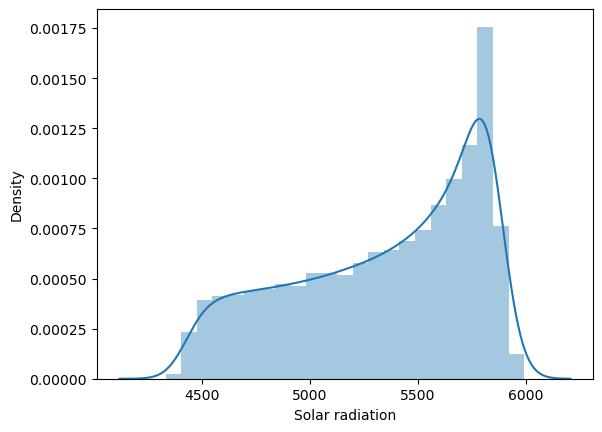



mean value 30.275670794633644
median value 30.5
mode value 0    30.5
Name: Next_Tmax, dtype: float64


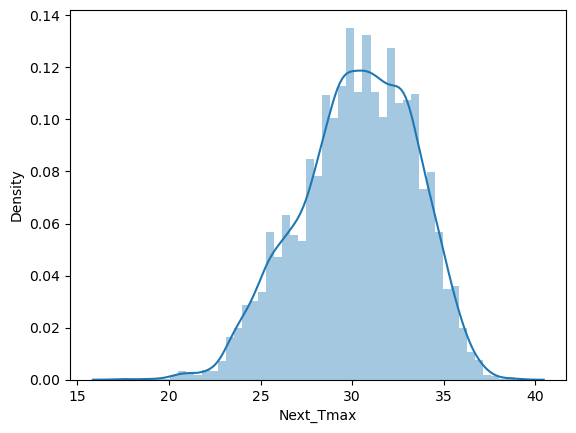



mean value 22.932804437564496
median value 23.1
mode value 0    23.5
Name: Next_Tmin, dtype: float64


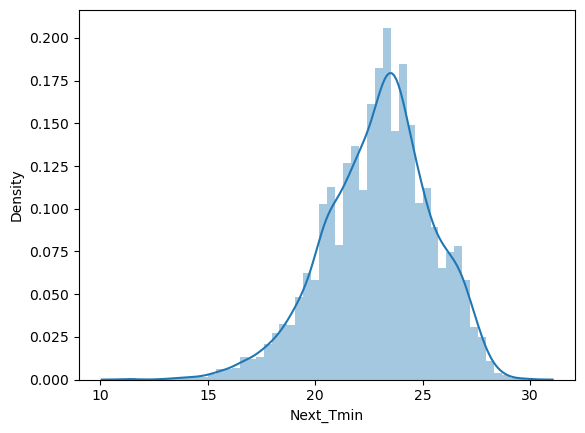

In [118]:
for i in df.columns:
    print('mean value',df[i].mean())
    print('median value',df[i].median())
    print('mode value',df[i].mode())
    sns.distplot(df[i])
    plt.show()
    print('\n')

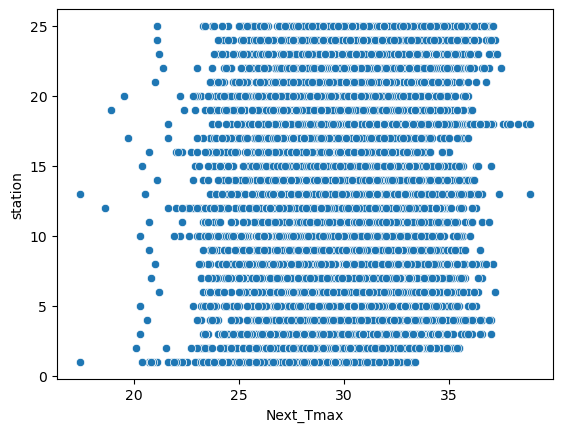

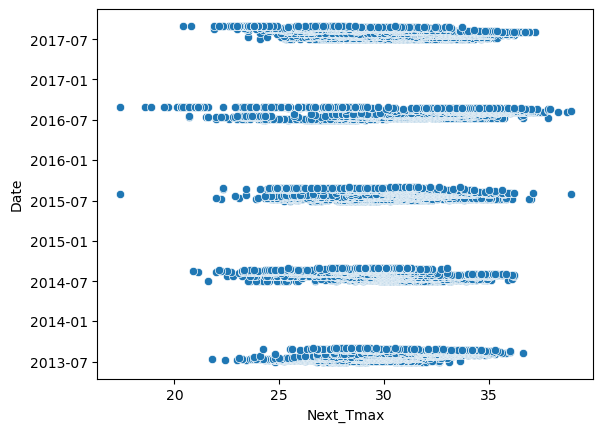

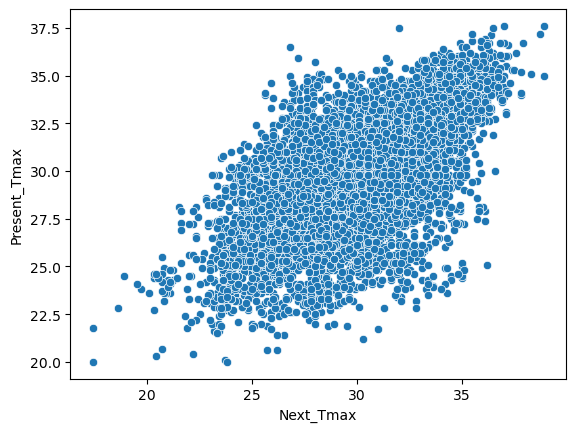

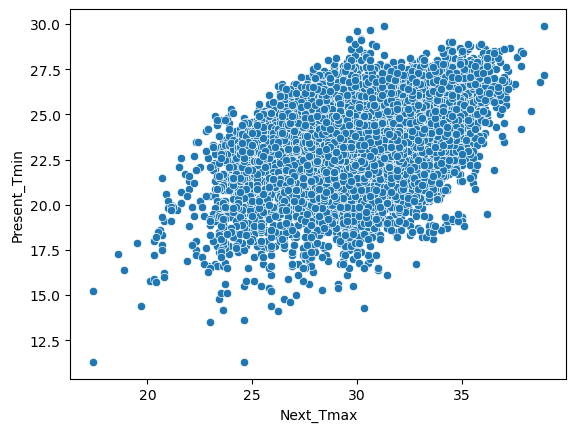

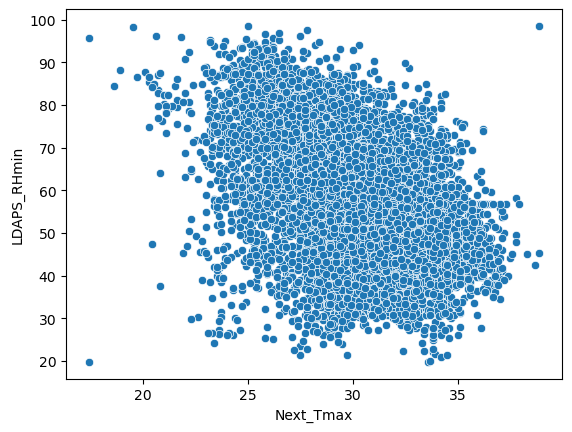

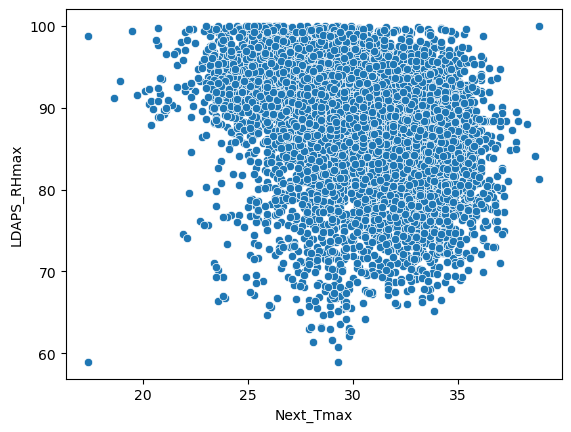

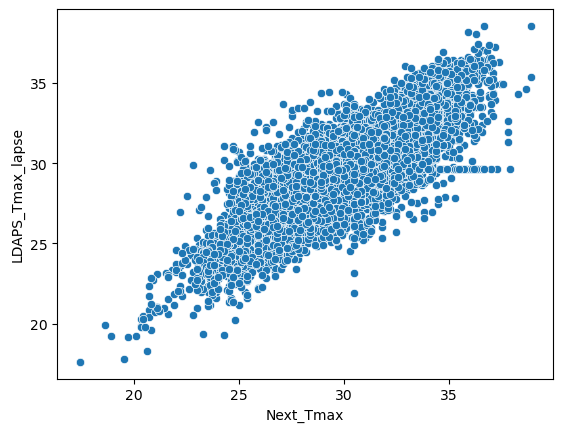

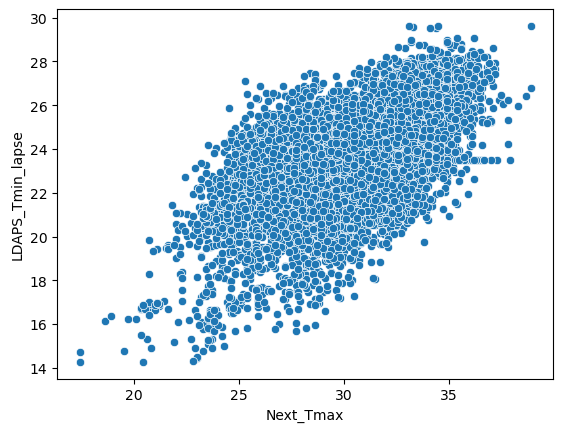

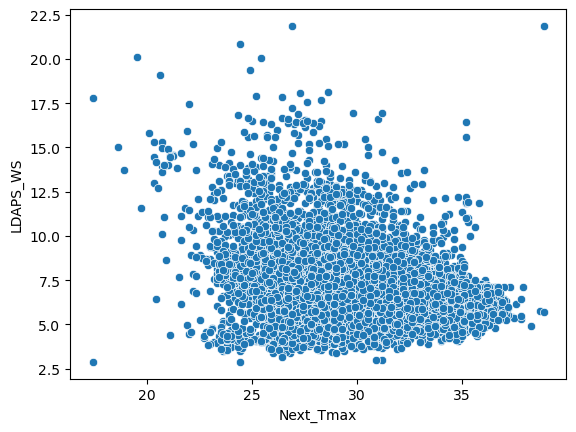

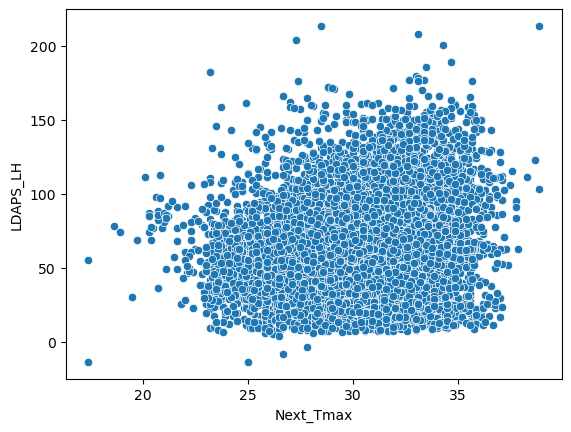

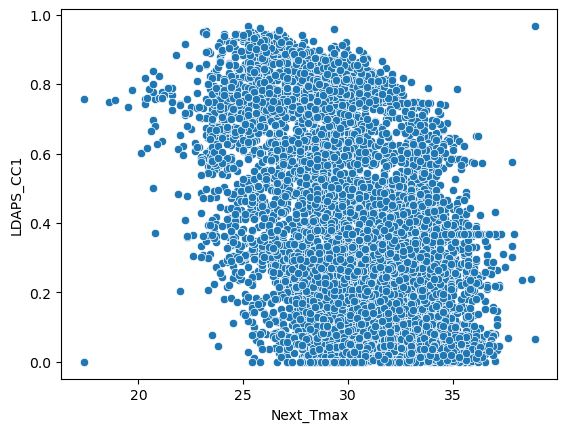

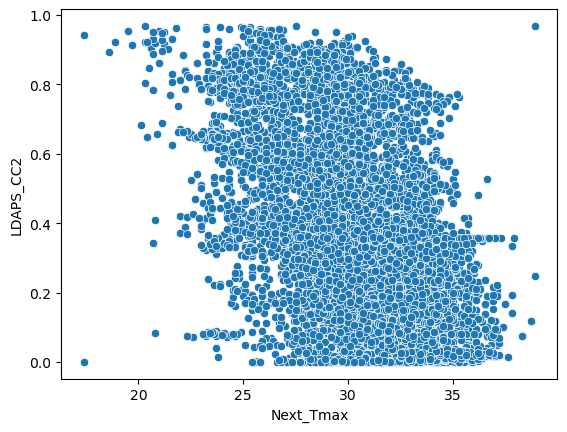

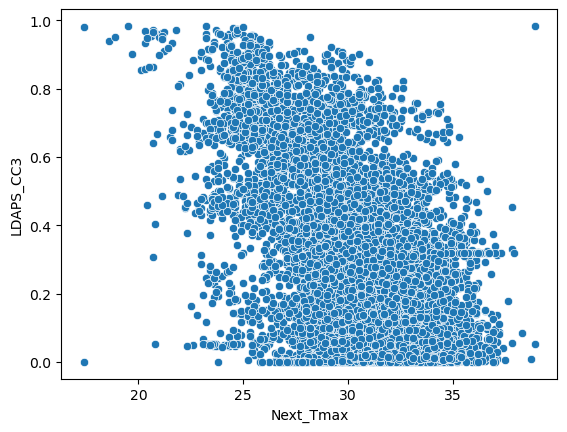

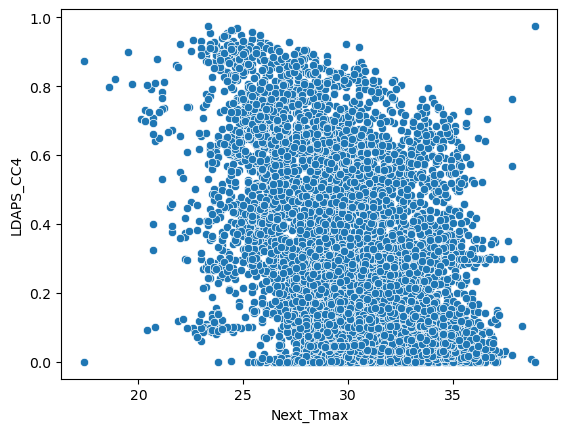

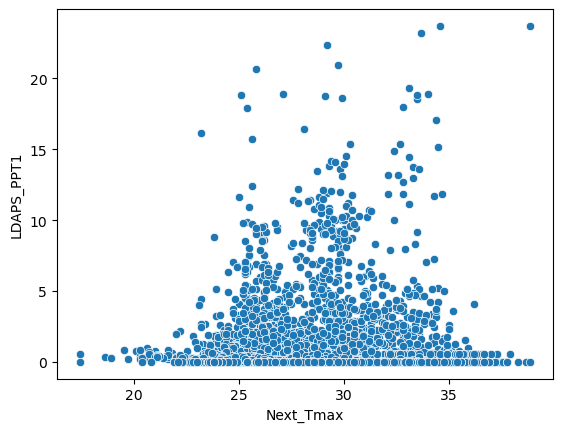

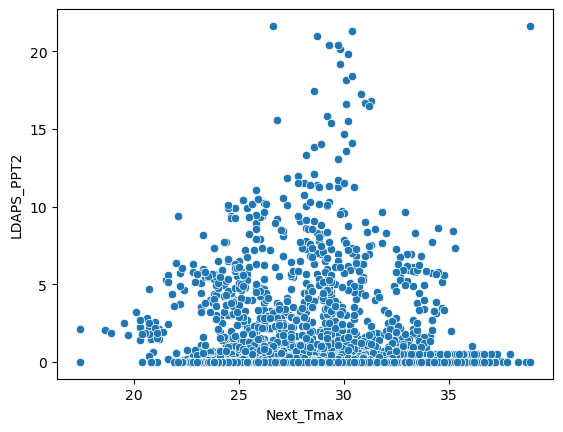

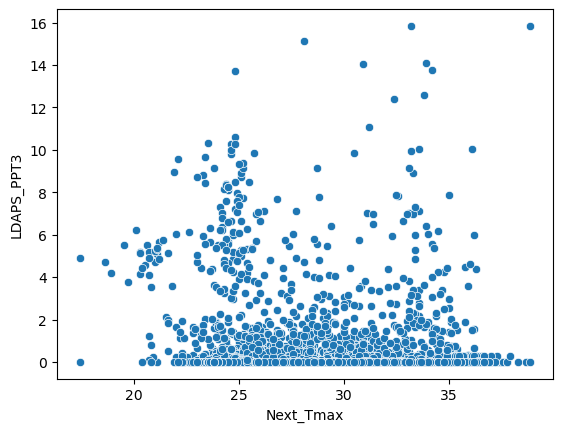

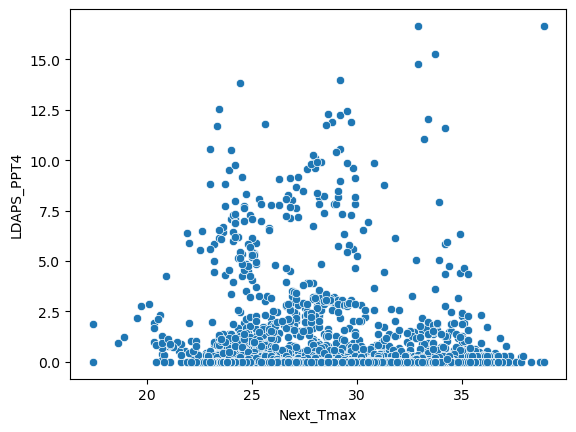

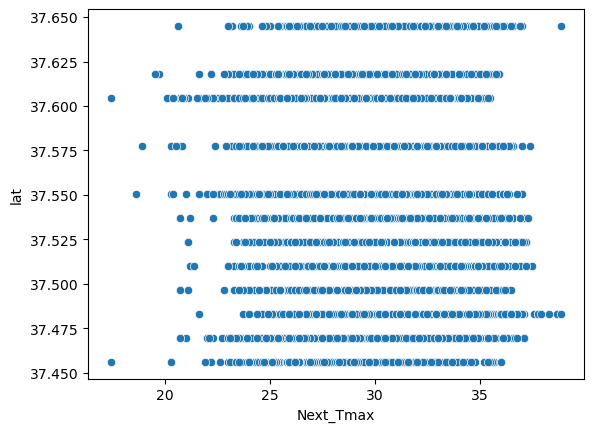

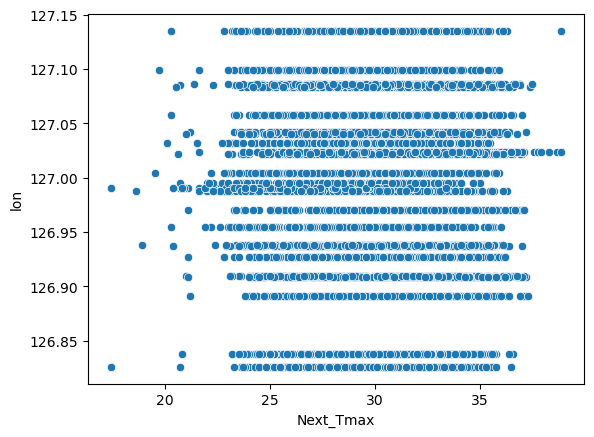

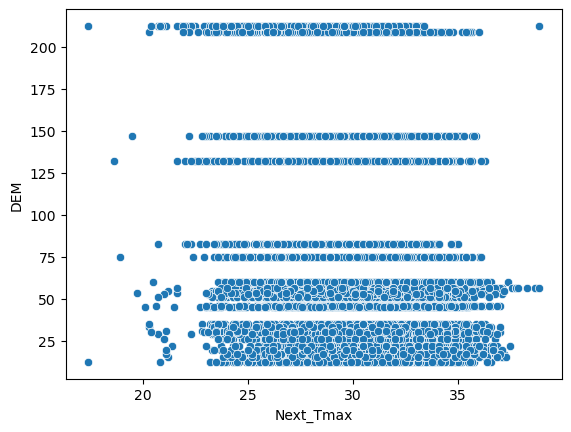

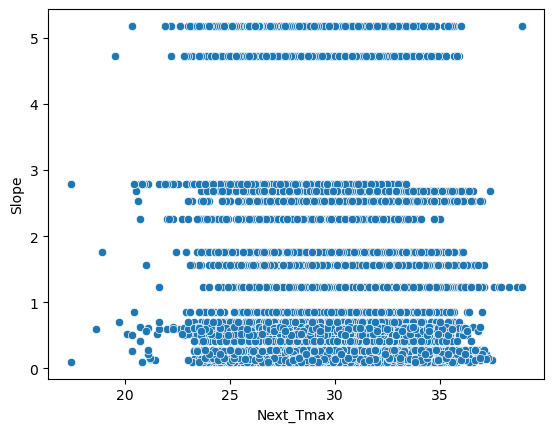

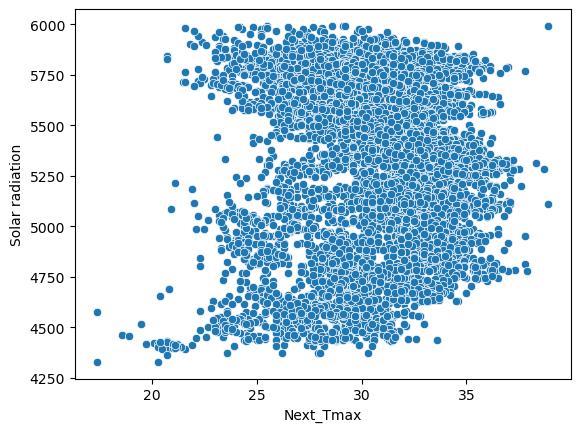

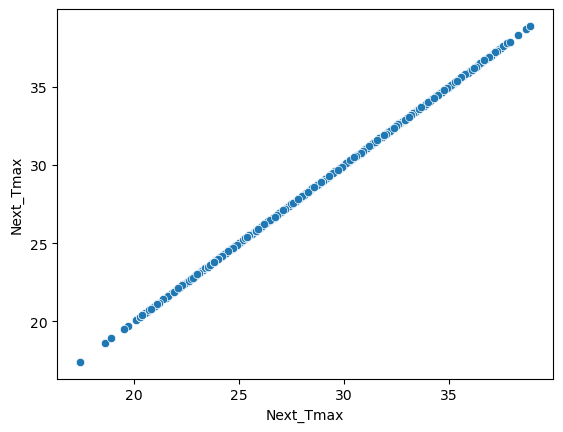

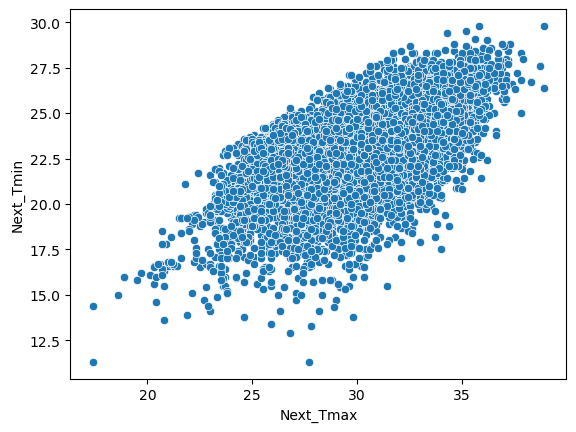

In [119]:
for i in df.columns:
    sns.scatterplot(x='Next_Tmax',y=i,data=df)
    plt.show()

the ('Present_Tmax'), ('Present_Tmin'),('LDAPS_Tmax_lapse'), ('LDAPS_Tmin_lapse'), ('Next_Tmin') this are the  features which are highly correlated with target ('Next_Tmax') variable.

In [120]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

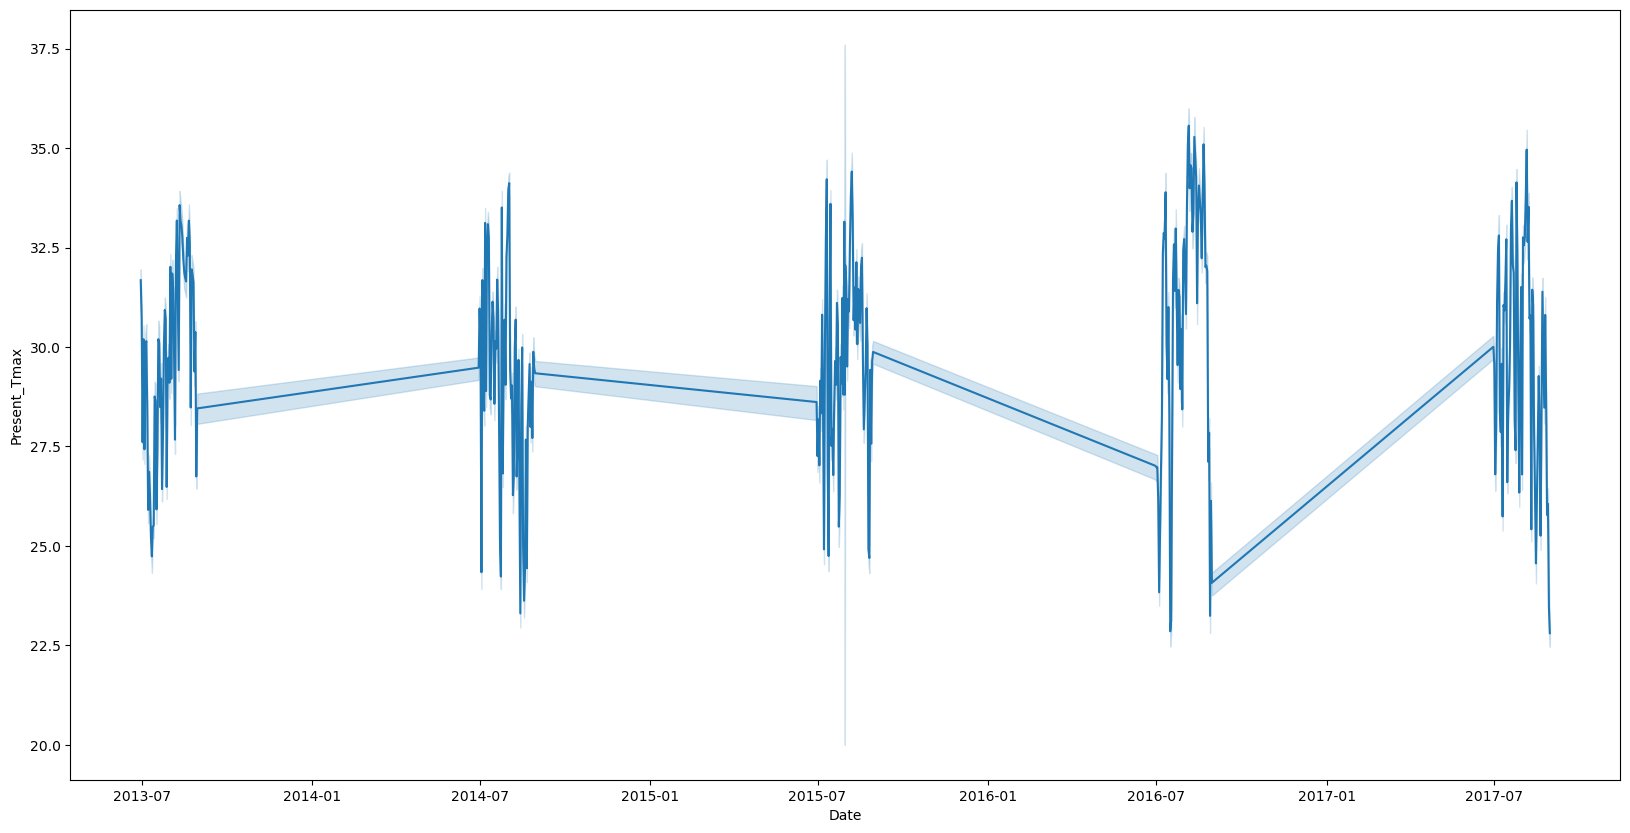

In [121]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y='Present_Tmax',data=df)
plt.show()

# Checking Skewness

In [122]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [123]:
#df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])
df['DEM']=np.cbrt(df['DEM'])
df['Slope']=np.cbrt(df['Slope'])


In [124]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          1.922841
LDAPS_PPT2          0.832326
LDAPS_PPT3          2.523911
LDAPS_PPT4          2.792122
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

Here we have removed the skeweness 

In [125]:
cor=df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112655      0.131646    -0.066733   
Present_Tmax      0.112655      1.000000      0.618760    -0.204571   
Present_Tmin      0.131646      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066733     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166984     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069107      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.104758      0.623496      0.762993     0.089476   
LDAPS_WS          0.005277     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133357      0.135463     -0.009258    -0.070858   
LDAPS_CC1         0.006919     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003396     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000694     -0.144018     -0.002772     0.689679   
LDAPS_CC4         0.006126     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -0.004604     -0.174302      0.122951     0.426192   
LDAPS_PPT2       -0.005392     -0.189238      0.118389     0.465081   
LDAPS_PPT3       -0.017031     -0.124956     -0.013341     0.434027   
LDAPS_PPT4       -0.006315     -0.116687     -0.082117     0.297530   
lat              -0.237502     -0.052615     -0.078475     0.087099   
lon              -0.118704      0.009020     -0.043461    -0.076237   
DEM              -0.287338     -0.172526     -0.256285     0.089954   
Slope            -0.125721     -0.109443     -0.165170     0.101834   
Solar radiation  -0.019001     -0.025439      0.053578     0.244080   
Next_Tmax         0.107900      0.610310      0.471815    -0.437807   
Next_Tmin         0.128216      0.622706      0.796676     0.095101   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.407461         -0.248993          0.007585  0.258832   
LDAPS_PPT2           0.431325         -0.293013          0.006257  0.289791   
LDAPS_PPT3           0.242978         -0.324153         -0.090729  0.222170   
LDAPS_PPT4           0.172899         -0.273588         -0.147907  0.253141   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.180116         -0.161834         -0.197767  0.174483   
Slope                0.203347         -0.137801         -0.179961  0.152532   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283679          0.827114          0.587002 -0.342689   
Next_Tmin           -0.071944          0.586800          0.880192 -0.096540   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133357   0.006919  ...   -0.005392   -0.017031   
Present_Tmax      0.135463  -0.311805  ...   -0.189238   -0.124956   
Present_Tmin     -0.009258   0.084447  ...    0.118389   

<Axes: >

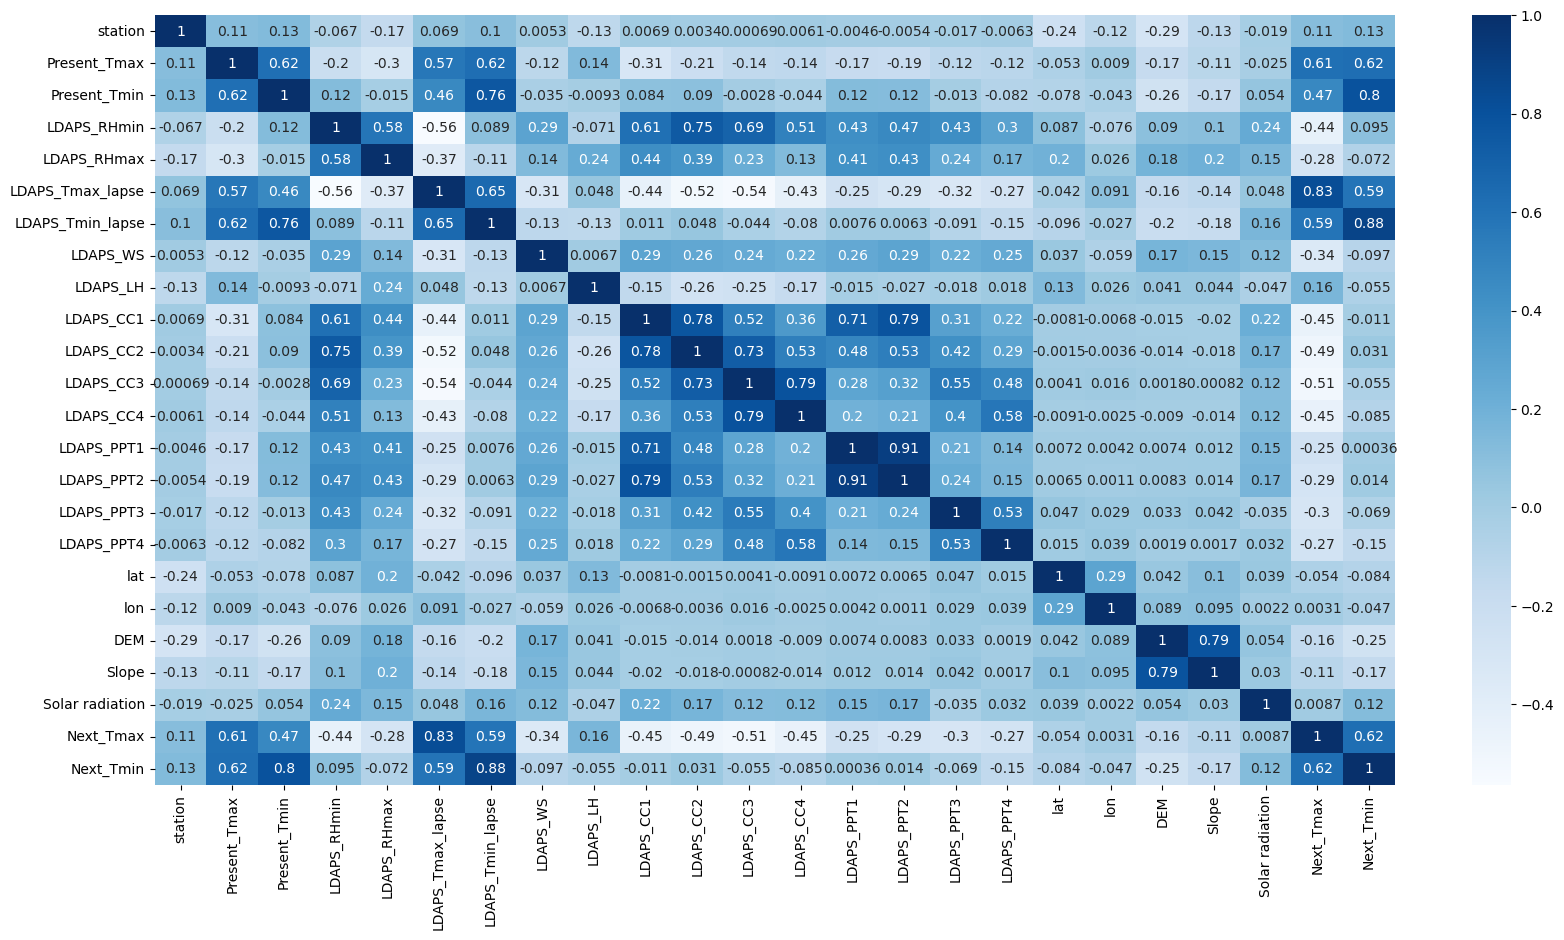

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Blues')

In [127]:
cor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827114
Next_Tmin           0.621434
Present_Tmax        0.610310
LDAPS_Tmin_lapse    0.587002
Present_Tmin        0.471815
LDAPS_LH            0.157692
station             0.107900
Solar radiation     0.008701
lon                 0.003076
lat                -0.053557
Slope              -0.105064
DEM                -0.158631
LDAPS_PPT1         -0.251802
LDAPS_PPT4         -0.270802
LDAPS_RHmax        -0.283679
LDAPS_PPT2         -0.286088
LDAPS_PPT3         -0.298133
LDAPS_WS           -0.342689
LDAPS_RHmin        -0.437807
LDAPS_CC4          -0.446287
LDAPS_CC1          -0.452458
LDAPS_CC2          -0.490673
LDAPS_CC3          -0.514599
Name: Next_Tmax, dtype: float64

as we can see features ('LDAPS_Tmax_lapse','Next_Tmin','Present_Tmax','LDAPS_Tmin_lapse','Present_Tmin') are positively correlated with the target variable('Next_Tmax')

# Separating features and label.

In [128]:
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']
print('feature Dimension',x.shape)
print('featur Dimension',y.shape)

feature Dimension (7752, 24)
featur Dimension (7752,)


Here we have to change the data type of Date features for the Scaling purpose.

In [129]:
x=df.drop('Date',axis=1)

# Feature Scaling 

In [130]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664315     -0.361326     -0.759529     0.102515     0.383078   
1    -1.525622      0.721084     -0.676296    -0.308027     0.311586   
2    -1.386929      0.619608      0.031188    -0.552814    -0.614982   
3    -1.248236      0.754909      0.072805     0.101426     1.133054   
4    -1.109544      0.551957     -0.551446    -0.040098     0.248765   
...        ...           ...           ...          ...          ...   
7747  1.386929     -2.187892     -2.549048    -2.056591    -1.328126   
7748  1.525622     -2.187892     -2.299348    -2.241619    -1.548184   
7749  1.664315     -2.221718     -2.424198    -2.317504    -1.555342   
7750  0.000000     -3.304127     -4.962817    -2.532517    -4.113443   
7751  0.000000      2.649126      2.777891     2.861419     1.624409   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.524889         -0.216663 -0.128382  0.206966  -0.516243  ...   
1             0.080895          0.223848 -0.646994 -0.314841  -0.548557  ...   
2             0.162936          0.451210 -0.441604 -1.249283  -0.610450  ...   
3             0.031092         -0.079874 -0.666247  0.095997  -0.583539  ...   
4            -0.170325         -0.011187 -0.627154  1.354409  -0.832287  ...   
...                ...               ...       ...       ...        ...  ...   
7747         -1.112066         -2.029679 -0.436683  0.284622  -1.297018  ...   
7748         -0.887662         -2.047744 -0.255421 -0.454749  -1.274658  ...   
7749         -0.570780         -2.137962  0.088072 -1.591397  -1.224577  ...   
7750         -4.087857         -3.959146 -1.939757 -2.267499  -1.412018  ...   
7751          3.044561          2.616632  6.792009  4.496044   2.291644  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM  \
0      -0.730969   -0.494338   -0.439945  1.189286 -0.005000  2.327694   
1      -0.730969   -0.494338   -0.439945  1.189286  0.511177 -0.148505   
2      -0.730969   -0.494338   -0.439945  0.653021  0.838510 -0.490091   
3      -0.730969   -0.494338   -0.439945  1.991696  0.385280 -0.122836   
4      -0.730969   -0.494338   -0.439945  0.118743  1.807917 -0.433902   
...          ...         ...         ...       ...       ...       ...   
7747   -0.730969   -0.494338   -0.439945 -0.149390 -1.263971 -1.227687   
7748   -0.730969   -0.494338   -0.439945 -0.417522 -1.037356 -1.137368   
7749   -0.730969   -0.494338   -0.439945 -0.417522 -0.269384 -1.025223   
7750   -0.730969   -0.494338   -0.439945 -1.758184 -2.082302 -1.417645   
7751    2.446776    5.676782    5.937998  1.991696  1.807917  2.327694   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     1.271571         1.517935  -0.376530  -0.697829  
1    -0.423351         1.229950   0.071845  -0.174298  
2    -0.865063         1.216534   0.264006   0.389506  
3     1.149984         1.201176   0.456167   0.550592  
4    -0.435918         1.207205   0.296033  -0.174298  
...        ...              ...        ...        ...  
7747 -1.160416        -2.093040  -0.632744  -1.946251  
7748 -0.969766        -2.104553  -0.536664  -1.664349  
7749 -0.853417        -2.074325  -0.792878  -2.228152  
7750 -1.372596        -2.358212  -4.123667  -4.684723  
7751  2.175532         1.517935   2.762098   2.765534  

[7752 rows x 24 columns]

# Checking variance inflation factor.

In [131]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

VIF values          features
0     1.251388           station
1     2.926703      Present_Tmax
2     3.470126      Present_Tmin
3     6.564561       LDAPS_RHmin
4     2.279496       LDAPS_RHmax
5     9.152717  LDAPS_Tmax_lapse
6     9.277113  LDAPS_Tmin_lapse
7     1.376019          LDAPS_WS
8     1.557656          LDAPS_LH
9     5.910117         LDAPS_CC1
10    5.032077         LDAPS_CC2
11    5.677831         LDAPS_CC3
12    3.441882         LDAPS_CC4
13    5.998327        LDAPS_PPT1
14    7.912647        LDAPS_PPT2
15    1.856199        LDAPS_PPT3
16    1.962421        LDAPS_PPT4
17    1.252753               lat
18    1.186746               lon
19    3.295211               DEM
20    2.963687             Slope
21    1.249363   Solar radiation
22    4.759301         Next_Tmax
23    6.559870         Next_Tmin

here we have to drop the 'LDAPS_Tmin_lapse' features. because it is highly correlated with the other features. let's drop it

In [132]:
x.drop('LDAPS_Tmin_lapse',axis=1,inplace=True)

In [133]:
# again checking the inflation values.
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

VIF values          features
0     1.250393           station
1     2.744819      Present_Tmax
2     3.401869      Present_Tmin
3     5.266584       LDAPS_RHmin
4     2.263345       LDAPS_RHmax
5     5.808716  LDAPS_Tmax_lapse
6     1.370235          LDAPS_WS
7     1.490332          LDAPS_LH
8     5.792582         LDAPS_CC1
9     5.022184         LDAPS_CC2
10    5.677793         LDAPS_CC3
11    3.438543         LDAPS_CC4
12    5.993285        LDAPS_PPT1
13    7.890636        LDAPS_PPT2
14    1.840382        LDAPS_PPT3
15    1.960535        LDAPS_PPT4
16    1.247756               lat
17    1.183567               lon
18    3.192321               DEM
19    2.857756             Slope
20    1.245688   Solar radiation
21    4.677051         Next_Tmax
22    5.173115         Next_Tmin

here we can consider our threshold value is 5 

# modeling 

In [134]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        
print('maximum r2_score is', maxAccu, 'on random_state', maxRs)

maximum r2_score is 0.9999935327959074 on random_state 19


In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)

# Linear Regression

In [136]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('r2_score',r2_score(y_test,pred_lr))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_lr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_lr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score 1.0
r2_score on training data 1.0
mean_squared_error 2.5813319526303374e-29
mean_absolute_error 3.67032285905314e-15
sqrt mean_squared_error 5.080681010091401e-15


# SVR(support vector regressor)

In [137]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score',r2_score(y_test,pred_svr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_svr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_svr))
print('sqrt mean_sqaured_error',np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score 0.9928105476441268
r2_score on training data 0.992278143203415
mean_squared_error 0.06954177664531845
mean_absolute_error 0.14541968752384
sqrt mean_sqaured_error 0.263707748550016


# Decision Tree Regressor

In [138]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score', r2_score(y_test,pred_dtr))
print('r2_score on training data',r2_score(y_test,pred_dtr))
print('mean_squared_error',mean_squared_error(y_test,pred_dtr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_dtr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score 0.999865770719962
r2_score on training data 0.999865770719962
mean_squared_error 0.0012983662940670672
mean_absolute_error 0.002407566638020148
sqrt mean_squared_error 0.036032850207374206


# Kneighbors Regressor

In [139]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score',r2_score(y_test,pred_knn))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_knn))
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score 0.9120107690553966
r2_score on training data 0.9417173241810587
mean_squared_error 0.8510978503869304
mean_absolute_error 0.7112983662940671
sqrt mean_squared_error 0.9225496465702702


# Random Forest Regressor

In [140]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('r2_score',r2_score(y_test,pred_rfr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_rfr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_rfr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_rfr)))

r2_score 0.9998517951406773
r2_score on training data 0.9999784154512565
mean_squared_error 0.0014335485812553826
mean_absolute_error 0.0023112639725201734
sqrt mean_squared_error 0.03786223159370539


# Extra Trees Regressor

In [141]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2_score',r2_score(y_test,pred_etr))
print('r2_score on training data',r2_score(y_test,pred_etr))
print('mean_squared_error',mean_squared_error(y_test,pred_etr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_etr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_etr)))

r2_score 0.9999435853892584
r2_score on training data 0.9999435853892584
mean_squared_error 0.0005456844368013862
mean_absolute_error 0.006168529664673383
sqrt mean_squared_error 0.023359889486069627


# Ada Boost Regressor

In [142]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr=abr.predict(x_test)
pred_train=abr.predict(x_train)
print('r2_score',r2_score(y_test,pred_abr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_abr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_abr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_abr)))

r2_score 0.9931849075073328
r2_score on training data 0.9937478827258067
mean_squared_error 0.06592068720715304
mean_absolute_error 0.21034415957960012
sqrt mean_squared_error 0.25675024285704784


# Gradient Boosting Regressor

In [143]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print('r2_score',r2_score(y_test,pred_gbr))
print('r2_score on training data',r2_score(y_test,pred_gbr))
print('mean_squared_error',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_gbr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_gbr)))

r2_score 0.999781263261325
r2_score on training data 0.999781263261325
mean_squared_error 0.002115785830701674
mean_absolute_error 0.012997323884267166
sqrt mean_squared_error 0.045997672013936466


# Cross Validation score

In [144]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_lr)-score1.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between the cross validation score and r2_score 0.0


In [145]:
score2=cross_val_score(svr,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_svr)-score2.mean())*100)

[0.98092302 0.96213387 0.9885544  0.94610575 0.95828364]
0.9672001366531733
difference between the cross validation score and r2_score 2.5610410990953514


In [146]:
score3=cross_val_score(dtr,x,y)
print(score3)
print(score3.mean())
print('difference between cross validation score and r2_score',(r2_score(y_test,pred_dtr)-score3.mean())*100)

[0.99999649 0.99999284 0.99999907 0.99807169 0.99982104]
0.9995762260806856
difference between cross validation score and r2_score 0.0289544639276329


In [147]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and r2_Score',(r2_score(y_test,pred_knn)-score4.mean())*100)

[0.79864349 0.69721996 0.7127794  0.84618245 0.77650813]
0.7662666857469326
difference between the cross validation score and r2_Score 14.5744083308464


In [148]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,pred_rfr)-score5.mean())*100)

[0.99999922 0.99999517 0.99999974 0.99850635 0.99981786]
0.9996636693114374
difference between the cross validation score and the r2_score 0.018812582923999344


In [149]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_etr)-score6.mean())*100)

[0.999972   0.99974512 0.99994531 0.9987194  0.99925803]
0.9995279720517825
difference between the cross validation score and r2_score 0.041561333747597295


In [150]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_abr)-score7.mean())*100)

[0.9898404  0.99370261 0.99038437 0.99109068 0.99439128]
0.9918818666222101
difference between the cross validation score and r2_score 0.1303040885122675


In [151]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_gbr)-score8.mean())*100)

[0.99996186 0.99994076 0.9999605  0.99902885 0.99994857]
0.9997681093372057
difference between the cross validation score and r2_score 0.0013153924119269078


Here Linear Regression model is giving high r2_score it means this is our best performing model we will save this model.

# Hyper Parameter tunning

In [152]:
param={'fit_intercept':[12,14,47],
      'copy_X':[100,125,150,180],
      'n_jobs':[128,135,145,180]}

In [153]:
grid=GridSearchCV(LinearRegression(),param,cv=5)

In [154]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [100, 125, 150, 180],
                         'fit_intercept': [12, 14, 47],
                         'n_jobs': [128, 135, 145, 180]})

In [155]:
grid.best_params_

{'copy_X': 100, 'fit_intercept': 12, 'n_jobs': 128}

In [156]:
final_model1=LinearRegression(copy_X=200,fit_intercept=10,n_jobs=120)
final_model1.fit(x_train,y_train)
pred1=final_model1.predict(x_test)
print('r2_score',r2_score(y_test,pred1))
print('mean_squared_error',mean_squared_error(y_test,pred1))
print('mean_absolute_error',mean_absolute_error(y_test,pred1))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred1)))

r2_score 1.0
mean_squared_error 2.5813319526303374e-29
mean_absolute_error 3.67032285905314e-15
sqrt mean_squared_error 5.080681010091401e-15


In [157]:
final_model2=LinearRegression(copy_X=100,fit_intercept=12,n_jobs=128)
final_model2.fit(x_train,y_train)
pred2=final_model2.predict(x_test)
print('r2_score',r2_score(y_test,pred2))
print('mean_squared_error',mean_squared_error(y_test,pred2))
print('mean_absolute_error',mean_absolute_error(y_test,pred2))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred2)))

r2_score 1.0
mean_squared_error 2.5813319526303374e-29
mean_absolute_error 3.67032285905314e-15
sqrt mean_squared_error 5.080681010091401e-15


# Saving model

In [158]:
import joblib

In [159]:
joblib.dump(final_model1,'temperature_analysis.pkl')

['temperature_analysis.pkl']

In [160]:
output=joblib.load('temperature_analysis.pkl')

In [161]:
output.predict(x_test)


array([32.2, 24.2, 34.2, ..., 29.2, 27.6, 31.4])

In [162]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')


In [164]:
df1

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [166]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0         0.0         0.0  37.6046  126.991  5.965871  1.406938   
1         0.0         0.0  37.6046  127.032  3.550622  0.801092   
2         0.0         0.0  37.5776  127.058  3.217444  0.643203   
3         0.0         0.0  37.6450  127.022  3.575659  1.363477   
4         0.0         0.0  37.5507  127.135  3.272250  0.796600   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

here our target variable is Next_Tmin

In [165]:
df.shape

(7752, 25)

# Separating Features

In [170]:
x=df.drop('Next_Tmin',axis=1)
y=df['Next_Tmin']
print('Feature Dimension',x.shape)
print('Label Dimension',y.shape)

Feature Dimension (7752, 24)
Label Dimension (7752,)


here we have to drop the Date columns for scaling the dataset.

In [178]:
x.drop('Date',axis=1,inplace=True)

# Feature Scaling

In [179]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664315     -0.361326     -0.759529     0.102515     0.383078   
1    -1.525622      0.721084     -0.676296    -0.308027     0.311586   
2    -1.386929      0.619608      0.031188    -0.552814    -0.614982   
3    -1.248236      0.754909      0.072805     0.101426     1.133054   
4    -1.109544      0.551957     -0.551446    -0.040098     0.248765   
...        ...           ...           ...          ...          ...   
7747  1.386929     -2.187892     -2.549048    -2.056591    -1.328126   
7748  1.525622     -2.187892     -2.299348    -2.241619    -1.548184   
7749  1.664315     -2.221718     -2.424198    -2.317504    -1.555342   
7750  0.000000     -3.304127     -4.962817    -2.532517    -4.113443   
7751  0.000000      2.649126      2.777891     2.861419     1.624409   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.524889         -0.216663 -0.128382  0.206966  -0.516243  ...   
1             0.080895          0.223848 -0.646994 -0.314841  -0.548557  ...   
2             0.162936          0.451210 -0.441604 -1.249283  -0.610450  ...   
3             0.031092         -0.079874 -0.666247  0.095997  -0.583539  ...   
4            -0.170325         -0.011187 -0.627154  1.354409  -0.832287  ...   
...                ...               ...       ...       ...        ...  ...   
7747         -1.112066         -2.029679 -0.436683  0.284622  -1.297018  ...   
7748         -0.887662         -2.047744 -0.255421 -0.454749  -1.274658  ...   
7749         -0.570780         -2.137962  0.088072 -1.591397  -1.224577  ...   
7750         -4.087857         -3.959146 -1.939757 -2.267499  -1.412018  ...   
7751          3.044561          2.616632  6.792009  4.496044   2.291644  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.568897   -0.730969   -0.494338   -0.439945  1.189286 -0.005000   
1      -0.568897   -0.730969   -0.494338   -0.439945  1.189286  0.511177   
2      -0.568897   -0.730969   -0.494338   -0.439945  0.653021  0.838510   
3      -0.568897   -0.730969   -0.494338   -0.439945  1.991696  0.385280   
4      -0.568897   -0.730969   -0.494338   -0.439945  0.118743  1.807917   
...          ...         ...         ...         ...       ...       ...   
7747   -0.568897   -0.730969   -0.494338   -0.439945 -0.149390 -1.263971   
7748   -0.568897   -0.730969   -0.494338   -0.439945 -0.417522 -1.037356   
7749   -0.568897   -0.730969   -0.494338   -0.439945 -0.417522 -0.269384   
7750   -0.568897   -0.730969   -0.494338   -0.439945 -1.758184 -2.082302   
7751    4.775752    2.446776    5.676782    5.937998  1.991696  1.807917   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.327694  1.271571         1.517935  -0.376530  
1    -0.148505 -0.423351         1.229950   0.071845  
2    -0.490091 -0.865063         1.216534   0.264006  
3    -0.122836  1.149984         1.201176   0.456167  
4    -0.433902 -0.435918         1.207205   0.296033  
...        ...       ...              ...        ...  
7747 -1.227687 -1.160416        -2.093040  -0.632744  
7748 -1.137368 -0.969766        -2.104553  -0.536664  
7749 -1.025223 -0.853417        -2.074325  -0.792878  
7750 -1.417645 -1.372596        -2.358212  -4.123667  
7751  2.327694  2.175532         1.517935   2.762098  

[7752 rows x 23 columns]

Here we have scaled the dataset.

In [181]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

VIF values          features
0     1.250381           station
1     2.926534      Present_Tmax
2     3.100456      Present_Tmin
3     6.517871       LDAPS_RHmin
4     2.276427       LDAPS_RHmax
5     9.139416  LDAPS_Tmax_lapse
6     7.315935  LDAPS_Tmin_lapse
7     1.356076          LDAPS_WS
8     1.557231          LDAPS_LH
9     5.907623         LDAPS_CC1
10    5.026546         LDAPS_CC2
11    5.676393         LDAPS_CC3
12    3.426216         LDAPS_CC4
13    5.923060        LDAPS_PPT1
14    7.867988        LDAPS_PPT2
15    1.855084        LDAPS_PPT3
16    1.943960        LDAPS_PPT4
17    1.251040               lat
18    1.186742               lon
19    3.180939               DEM
20    2.923337             Slope
21    1.249132   Solar radiation
22    4.247046         Next_Tmax

# creating train test split

In [182]:
# finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    if acc>maxAccu :
        maxAccu=acc
        maxRS=i
        
print('maximum r2 score is',maxAccu, 'on Random_state', maxRS)
    

maximum r2 score is 0.9998365929191178 on Random_state 1


In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Linear Regression

In [187]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('r2_score',r2_score(y_test,pred_lr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_lr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_lr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score 0.8474809680596963
r2_score on training data 0.8471203166599345
mean_squared_error 0.9394269481181403
mean_absolute_error 0.7563453816475266
sqrt mean_squared_error 0.9692403974856497


# SVR (Support vector regressor)

In [188]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score',r2_score(y_test,pred_svr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_svr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_svr))
print('sqrt mean_squared_error',mean_squared_error(y_test,pred_svr))

r2_score 0.8977568711664424
r2_score on training data 0.9271248130444718
mean_squared_error 0.6297571474473623
mean_absolute_error 0.5747214615126773
sqrt mean_squared_error 0.6297571474473623


# Decision Tree Regressor.

In [189]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score',r2_score(y_test,pred_dtr))
print('r2_score on training data',r2_score(y_test,pred_dtr))
print('mean_squared_error',mean_squared_error(y_test,pred_dtr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_dtr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score 0.786725324887622
r2_score on training data 0.786725324887622
mean_squared_error 1.313645743766122
mean_absolute_error 0.8445399828030955
sqrt mean_squared_error 1.1461438582333903


# KNeighbors Regressor

In [190]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score',r2_score(y_test,pred_knn))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_knn))
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score 0.8577822534792335
r2_score on training data 0.9158406518868347
mean_squared_error 0.875977128116939
mean_absolute_error 0.6992519346517627
sqrt mean_squared_error 0.9359364979083458


# Random Forest Regressor.

In [191]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('r2_score',r2_score(y_test,pred_rfr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_rfr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_rfr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_rfr)))


r2_score 0.9019055096823467
r2_score on training data 0.9866061145104671
mean_squared_error 0.6042039901117797
mean_absolute_error 0.5817416165090284
sqrt mean_squared_error 0.7773055963466233


# Extra Trees Regressor

In [193]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2_score',r2_score(y_test,pred_etr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_etr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_etr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_etr)))

r2_score 0.9141983557740397
r2_score on training data 0.9999999998804887
mean_squared_error 0.5284873353396385
mean_absolute_error 0.5432330180567496
sqrt mean_squared_error 0.7269713442355472


# Ada Boost Regressor.

In [194]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr=abr.predict(x_test)
pred_train=abr.predict(x_train)
print('r2_score',r2_score(y_test,pred_abr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_abr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_abr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_abr)))

r2_score 0.8118146818721229
r2_score on training data 0.8233654926372611
mean_squared_error 1.1591101572078397
mean_absolute_error 0.8745570836315503
sqrt mean_squared_error 1.0766197830282702


# Gradient Boosting Regressor

In [195]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print('r2_score',r2_score(y_test,pred_gbr))
print('r2_score on training data', r2_score(y_test,pred_gbr))
print('mean_squared_error',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_gbr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_gbr)))

r2_score 0.8884897176483215
r2_score on training data 0.8884897176483215
mean_squared_error 0.6868373271240741
mean_absolute_error 0.6426815909769293
sqrt mean_squared_error 0.8287564944687155


# cross validation score

In [196]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_lr)-score1.mean())*100)

[0.71088077 0.67615776 0.80690826 0.88620054 0.88009358]
0.7920481809510849
difference between the cross validation score and r2_score 5.543278710861143


In [199]:
score2=cross_val_score(svr,x,y)
print(score2)
print(score2.mean())
print('differece between the cross validation score and r2_score',(r2_score(y_test,pred_svr)-score2.mean())*100)

[0.6693596  0.643919   0.79831791 0.8261343  0.8177064 ]
0.751087442388082
differece between the cross validation score and r2_score 14.666942877836043


In [200]:
score3=cross_val_score(dtr,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_dtr)))

[0.40785424 0.46781589 0.61243202 0.77217124 0.68522642]
0.5890999626776746
difference between the cross validation score and r2_score 0.786725324887622


In [201]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score r2_score',(r2_score(y_test,pred_knn)-score4.mean())*100)

[0.50974242 0.4911315  0.69299069 0.72724632 0.78966823]
0.6421558312689767
difference between the cross validation score r2_score 21.562642221025683


In [202]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('differece between the cross validation score and r2_score',(r2_score(y_test,pred_rfr)-score5.mean())*100)

[0.6911431  0.67961625 0.81769822 0.87607941 0.8729866 ]
0.7875047165884101
differece between the cross validation score and r2_score 11.440079309393658


In [203]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between cross validation score and r2_Score',r2_score(y_test,pred_etr)-score6.mean()*100)

[0.70567189 0.67417845 0.82225805 0.87987435 0.88365031]
0.7931266110723328
difference between cross validation score and r2_Score -78.39846275145925


In [205]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_abr)))


[0.65266742 0.61327095 0.76404302 0.82999581 0.84553129]
0.7411016971525297
difference between the cross validation score and r2_score 0.8118146818721229


In [206]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('differenc between the cross validation score and r2_score',(r2_score(y_test,pred_gbr)))

[0.69918551 0.68338813 0.84026132 0.88063736 0.89280058]
0.799254579380837
differenc between the cross validation score and r2_score 0.8884897176483215


here Gradient Boosting regressor is our best performing model it is giving high Accuracy.

# Saving the file

In [1]:
import joblib